# User Engagement Analysis  of the Telecom Dataset (Task-2)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


In [4]:
telecom_data = pd.read_csv(r'E:\KAIM 2\KAIM 2 Week 2\Week2\data\telcom.csv')
telecom_data.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social_Media,Google,Email,Youtube,Netflix,Gaming,Other,Total_data
0,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082020e+14,3.366447e+10,8.600910e+13,T21335C,217.0,4.0,28305.0,6500.0,5722628.0,312007.0,68.0,17.0,7.0,5.0,98.0,1.0,0.0,0.0,35986300.0,689004.0,2623085.0,2632442.0,889834916.0,Huawei,Huawei B593S-22,485.0,98.0,596.0,24.0,1445.0,1.0,5566.0,7852.0,829305.0,10046.0,7241855.0,1580541.0,1541381.0,807271.0,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0,839351.0,8822396.0,2348652.0,19623308.0,20124838.0,505668618.0,538369717.0,568809782.0
1,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,409.0,43.0,29501.0,10557.0,9844005.0,21586.0,91.0,4.0,1.0,1.0,98.0,0.0,0.0,0.0,9059559.0,1400957.0,3813488.0,2505174.0,706649328.0,Huawei,Huawei E5180,270.0,100.0,309.0,18.0,766.0,11.0,14793.0,10565.0,3184530.0,9277.0,10719953.0,36395.0,141717.0,902776.0,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0,3193807.0,10756348.0,1044493.0,25470580.0,33305076.0,374527977.0,161491704.0,448432970.0
2,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082010e+14,3.366274e+10,3.528140e+13,T72937C,853.0,2.0,11517.0,10147.0,765968.0,31267.0,90.0,6.0,2.0,0.0,90.0,6.0,1.0,0.0,9564415.0,416161.0,910607.0,943768.0,314961271.0,Samsung,Samsung Galaxy A8 (2018),8.0,159.0,50.0,22.0,163.0,41.0,2211.0,2112.0,2432521.0,56156.0,3240592.0,264372.0,726091.0,673073.0,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0,2488677.0,3504964.0,1399164.0,41043086.0,26529939.0,62498650.0,531681682.0,143937207.0
3,1.304243e+19,4/21/2019 19:35,344.0,4/25/2019 2:59,259.0,285833.0,2.082020e+14,3.366917e+10,3.566260e+13,L41432B,91.0,24.0,54827.0,8032.0,593180.0,64919.0,84.0,7.0,3.0,4.0,97.0,1.0,0.0,0.0,1480633.0,174836.0,2363399.0,2454436.0,285833915.0,Samsung,Samsung Galaxy S9 Plus (Sm-G965F),260.0,115.0,236.0,3.0,456.0,10.0,5372.0,6197.0,2858041.0,16452.0,4954251.0,2870296.0,1292760.0,660744.0,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0,2874493.0,7824547.0,1953504.0,14681741.0,23184787.0,170897869.0,419885397.0,226300149.0
4,1.304243e+19,4/22/2019 1:17,301.0,4/25/2019 1:17,938.0,259201.0,2.082010e+14,3.366555e+10,8.637690e+13,T85779A,64.0,16.0,26410.0,3169.0,13296131.0,16627.0,58.0,3.0,5.0,32.0,99.0,0.0,0.0,0.0,1339475.0,181694.0,7846529.0,3686043.0,259201637.0,Huawei,Huawei B528S-23A,8091.0,97.0,1355.0,1.0,854.0,12.0,14447.0,19627.0,1769010.0,6983.0,7052986.0,2990860.0,2797274.0,433849.0,69288.0,19177045.0,10783199.0,8000048.0,496879416.0,1530545.0,247233250.0,1175435.0,33314765.0,519351173.0,1775993.0,10043846.0,3231123.0,192

In [5]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [8]:
renamed_df = telecom_data.rename(columns={'MSISDN/Number':'MSISDN','Dur. (ms)':'Duration'})
#rename.info()

In [11]:
# Session Frequency of Customers
agg_by_session_count = renamed_df.groupby('MSISDN').agg({'Bearer Id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['Bearer Id'], ascending = False)
session_freq_metrics.head(10)

,Bearer Id
MSISDN,
3.365955e+10,7
3.376373e+10,6
3.366258e+10,6
3.369844e+10,6
3.369925e+10,6
3.366578e+10,6
3.366130e+10,6
3.365073e+10,6
3.376354e+10,6


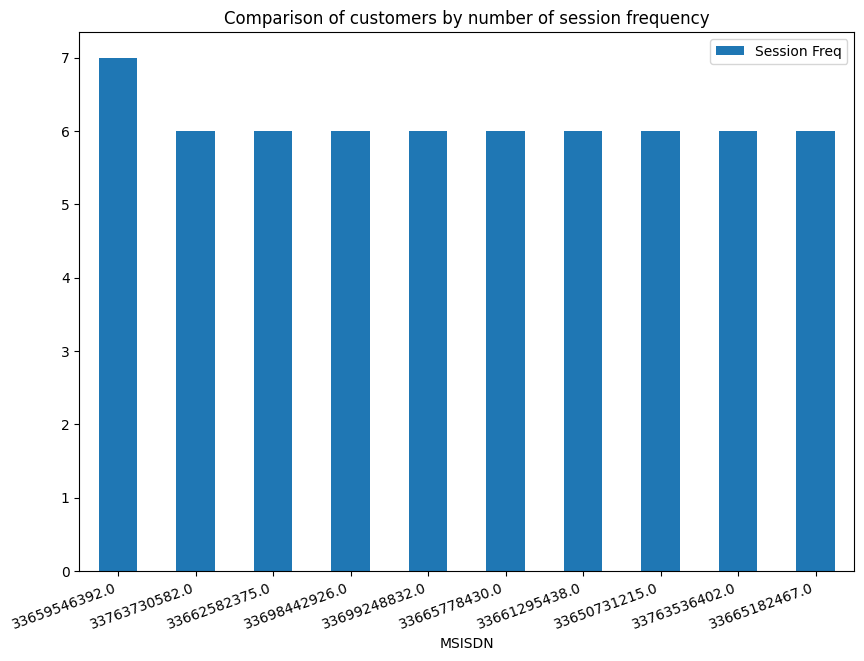

In [12]:
# Plotting the top 10 session frequency metrics

ax = session_freq_metrics.rename(columns={'Bearer Id': 'Session Freq'}).head(10).plot.bar(
    y=['Session Freq'], 
    title="Comparison of customers by number of session frequency",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [13]:
# The duration of the session
agg_by_duration = renamed_df.groupby('MSISDN').agg({'Duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['Duration'], ascending = False)
duration_metrics.head(10)

,Duration
MSISDN,
3.366893e+10,2369273.0
3.363004e+10,2024210.0
3.365955e+10,1896688.0
3.366284e+10,1628471.0
3.369870e+10,1382408.0
3.369881e+10,1379594.0
3.366884e+10,1350126.0
3.366842e+10,1333263.0
3.365996e+10,1319645.0


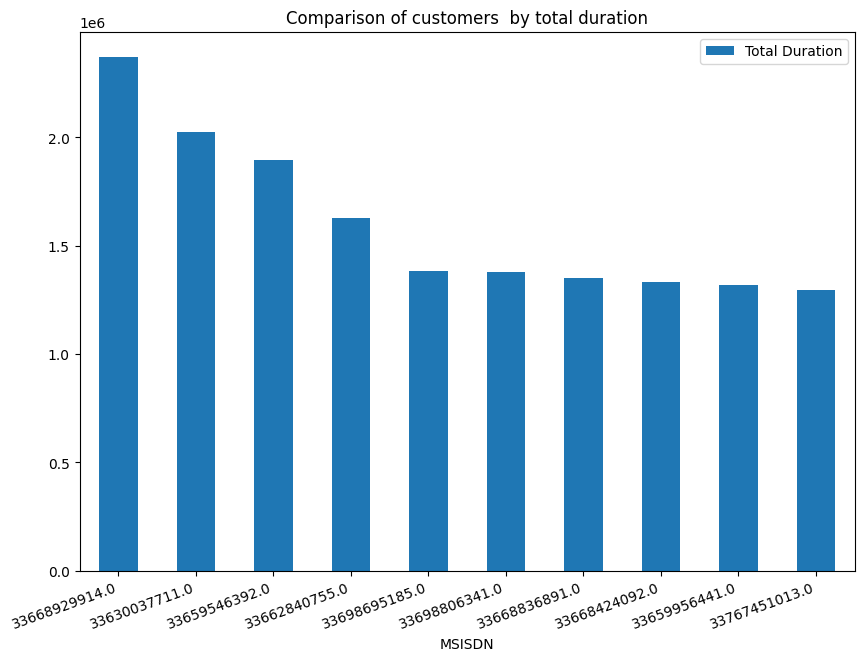

In [14]:
ax = duration_metrics.rename(columns={'Duration': 'Total Duration'}).head(10).plot.bar(
    y=['Total Duration'], 
    title="Comparison of customers  by total duration",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [15]:
# The Session total traffic (download and upload (bytes))
agg_by_data = renamed_df.groupby('MSISDN').agg({'Total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['Total_data'], ascending = False)
traffic_metric.head(10)

,Total_data
MSISDN,
3.365955e+10,4.612115e+09
3.369925e+10,3.752679e+09
3.365073e+10,3.734279e+09
3.366258e+10,3.727879e+09
3.366180e+10,3.725833e+09
3.366969e+10,3.584549e+09
3.365813e+10,3.574785e+09
3.369917e+10,3.531055e+09
3.376357e+10,3.482434e+09


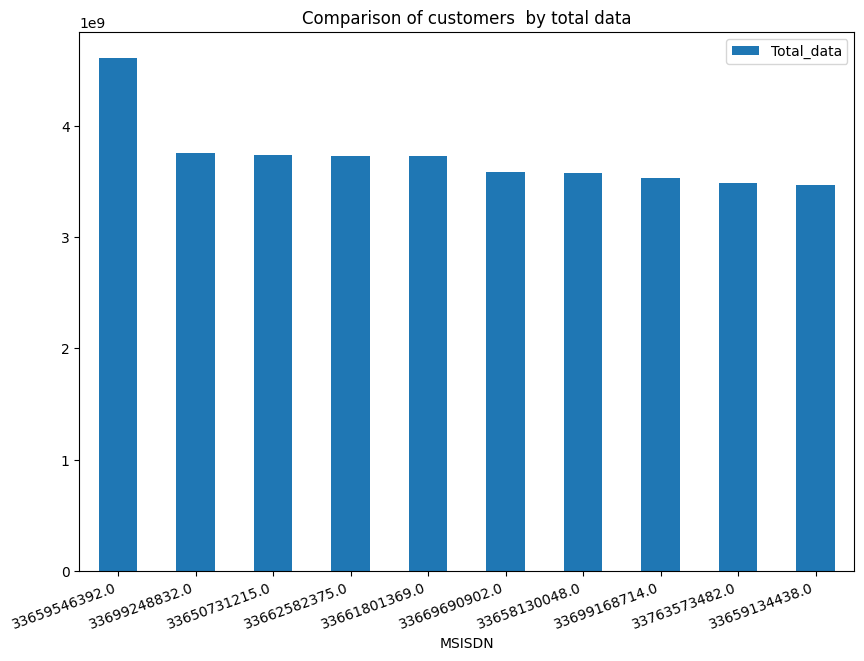

In [16]:
ax = traffic_metric.head(10).plot.bar(
    y=['Total_data'], 
    title="Comparison of customers  by total data",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()


In [17]:
engagment_metrics = renamed_df.groupby('MSISDN').agg({'Bearer Id': 'count','Duration': 'sum', 'Total_data': 'sum',})
engagment_metrics = engagment_metrics.rename(columns={'Bearer Id': 'sessions_frequency', 'Total_data': 'total_traffic'})
engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False).head(10)


,sessions_frequency,Duration,total_traffic
MSISDN,,,
3.365955e+10,7,1896688.0,4.612115e+09
3.376373e+10,6,518395.0,1.640307e+09
3.366258e+10,6,518397.0,3.727879e+09
3.369844e+10,6,497590.0,2.881097e+09
3.369925e+10,6,515573.0,3.752679e+09
3.366578e+10,6,555829.0,3.129471e+09
3.366130e+10,6,516945.0,2.970554e+09
3.365073e+10,6,513899.0,3.734279e+09
3.376354e+10,6,514325.0,3.423602e+09


### Task-2.1

##### 1) Aggregating metrics per MSISDN and top 10 customers per engagement metric

In [18]:
engagment_metrics = renamed_df.groupby('MSISDN').agg({'Bearer Id': 'count', 'Duration': 'sum', 'Total_data': 'sum'})
engagment_metrics = engagment_metrics.rename(columns={'Bearer Id': 'sessions_frequency', 'Total_data': 'total_traffic'})

# Sorting the DataFrame by sessions_frequency in descending order
engagment_metrics_sorted = engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False)

# Reporting the top 10 customers per engagement metric
top_10_sessions = engagment_metrics_sorted.nlargest(10, 'sessions_frequency')
top_10_duration = engagment_metrics_sorted.nlargest(10, 'Duration')
top_10_traffic = engagment_metrics_sorted.nlargest(10, 'total_traffic')

# Printing or using the resulting DataFrames
print("Top 10 customers by sessions frequency:")
print(top_10_sessions)

print("\nTop 10 customers by total duration:")
print(top_10_duration)

print("\nTop 10 customers by total traffic:")
print(top_10_traffic)

Top 10 customers by sessions frequency:
              sessions_frequency   Duration  total_traffic
MSISDN                                                    
3.365955e+10                   7  1896688.0   4.612115e+09
3.376373e+10                   6   518395.0   1.640307e+09
3.366258e+10                   6   518397.0   3.727879e+09
3.369844e+10                   6   497590.0   2.881097e+09
3.369925e+10                   6   515573.0   3.752679e+09
3.366578e+10                   6   555829.0   3.129471e+09
3.366130e+10                   6   516945.0   2.970554e+09
3.365073e+10                   6   513899.0   3.734279e+09
3.376354e+10                   6   514325.0   3.423602e+09
3.366518e+10                   6   518394.0   3.376239e+09

Top 10 customers by total duration:
              sessions_frequency   Duration  total_traffic
MSISDN                                                    
3.366893e+10                   5  2369273.0   2.772479e+09
3.363004e+10                   5  2024

##### 2) Normalizing engagement metric 

In [22]:
#import necessary python libraries for normalizing each engagement metric
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract relevant columns for clustering
X = engagment_metrics_sorted[['sessions_frequency','Duration','total_traffic']]

# Standardize (normalize) the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run k-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
engagment_metrics_sorted['Engagement Group'] = kmeans.fit_predict(X_scaled)

# Separate the DataFrame into three clusters
cluster_1_df = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 0]
cluster_2_df = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 1]
cluster_3_df = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 2]

# Display the number of customers in each cluster
print("Number of customers in Cluster 1:", len(cluster_1_df))
print("Number of customers in Cluster 2:", len(cluster_2_df))
print("Number of customers in Cluster 3:", len(cluster_3_df))

# Optional: Display cluster centers and other k-means information
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns))

# Optional: Save the separate DataFrames to CSV files
cluster_1_df.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/normalized/engagement_cluster_1.csv', index=False)
cluster_2_df.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/normalized/engagement_cluster_2.csv', index=False)
cluster_3_df.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/normalized/engagement_cluster_3.csv', index=False)

Number of customers in Cluster 1: 12017
Number of customers in Cluster 2: 1618
Number of customers in Cluster 3: 53

Cluster Centers:
   sessions_frequency      Duration  total_traffic
0            1.066323  8.042815e+04   5.118841e+08
1            2.825711  2.612265e+05   1.523810e+09
2            3.377358  1.008488e+06   1.728813e+09


##### 3) Computing the minimum, maximum, average & total non-normalized metrics 

In [23]:
# Compute non-normalized metrics for each cluster
cluster_1_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 0][['sessions_frequency', 'Duration', 'total_traffic']]
cluster_2_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 1][['sessions_frequency', 'Duration', 'total_traffic']]
cluster_3_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 2][['sessions_frequency', 'Duration', 'total_traffic']]

# Display non-normalized metrics for each cluster
print("\nCluster 1 Metrics:")
print("Minimum:")
print(cluster_1_metrics.min())
print("\nMaximum:")
print(cluster_1_metrics.max())
print("\nAverage:")
print(cluster_1_metrics.mean())
print("\nTotal:")
print(cluster_1_metrics.sum())



Cluster 1 Metrics:
Minimum:
sessions_frequency           1.0
Duration                  8125.0
total_traffic         38022357.0
dtype: float64

Maximum:
sessions_frequency    2.000000e+00
Duration              6.020490e+05
total_traffic         1.398728e+09
dtype: float64

Average:
sessions_frequency    1.066323e+00
Duration              8.042815e+04
total_traffic         5.118841e+08
dtype: float64

Total:
sessions_frequency    1.281400e+04
Duration              9.665051e+08
total_traffic         6.151312e+12
dtype: float64


In [24]:
# Compute non-normalized metrics for each cluster
cluster_1_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 0][['sessions_frequency', 'Duration', 'total_traffic']]
cluster_2_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 1][['sessions_frequency', 'Duration', 'total_traffic']]
cluster_3_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 2][['sessions_frequency', 'Duration', 'total_traffic']]

# Display non-normalized metrics for each cluster
print("\nCluster 2 Metrics:")
print("Minimum:")
print(cluster_2_metrics.min())
print("\nMaximum:")
print(cluster_2_metrics.max())
print("\nAverage:")
print(cluster_2_metrics.mean())
print("\nTotal:")
print(cluster_2_metrics.sum())



Cluster 2 Metrics:
Minimum:
sessions_frequency            1.0
Duration                  47696.0
total_traffic         253430209.0
dtype: float64

Maximum:
sessions_frequency    6.000000e+00
Duration              6.490300e+05
total_traffic         3.752679e+09
dtype: float64

Average:
sessions_frequency    2.825711e+00
Duration              2.612265e+05
total_traffic         1.523810e+09
dtype: float64

Total:
sessions_frequency    4.572000e+03
Duration              4.226645e+08
total_traffic         2.465525e+12
dtype: float64


In [25]:
# Compute non-normalized metrics for each cluster
cluster_1_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 0][['sessions_frequency', 'Duration', 'total_traffic']]
cluster_2_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 1][['sessions_frequency', 'Duration', 'total_traffic']]
cluster_3_metrics = engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 2][['sessions_frequency', 'Duration', 'total_traffic']]

# Display non-normalized metrics for each cluster
print("\nCluster 3 Metrics:")
print("Minimum:")
print(cluster_3_metrics.min())
print("\nMaximum:")
print(cluster_3_metrics.max())
print("\nAverage:")
print(cluster_3_metrics.mean())
print("\nTotal:")
print(cluster_3_metrics.sum())



Cluster 3 Metrics:
Minimum:
sessions_frequency            1.0
Duration                 658139.0
total_traffic         469367091.0
dtype: float64

Maximum:
sessions_frequency    7.000000e+00
Duration              2.369273e+06
total_traffic         4.612115e+09
dtype: float64

Average:
sessions_frequency    3.377358e+00
Duration              1.008488e+06
total_traffic         1.728813e+09
dtype: float64

Total:
sessions_frequency    1.790000e+02
Duration              5.344988e+07
total_traffic         9.162707e+10
dtype: float64


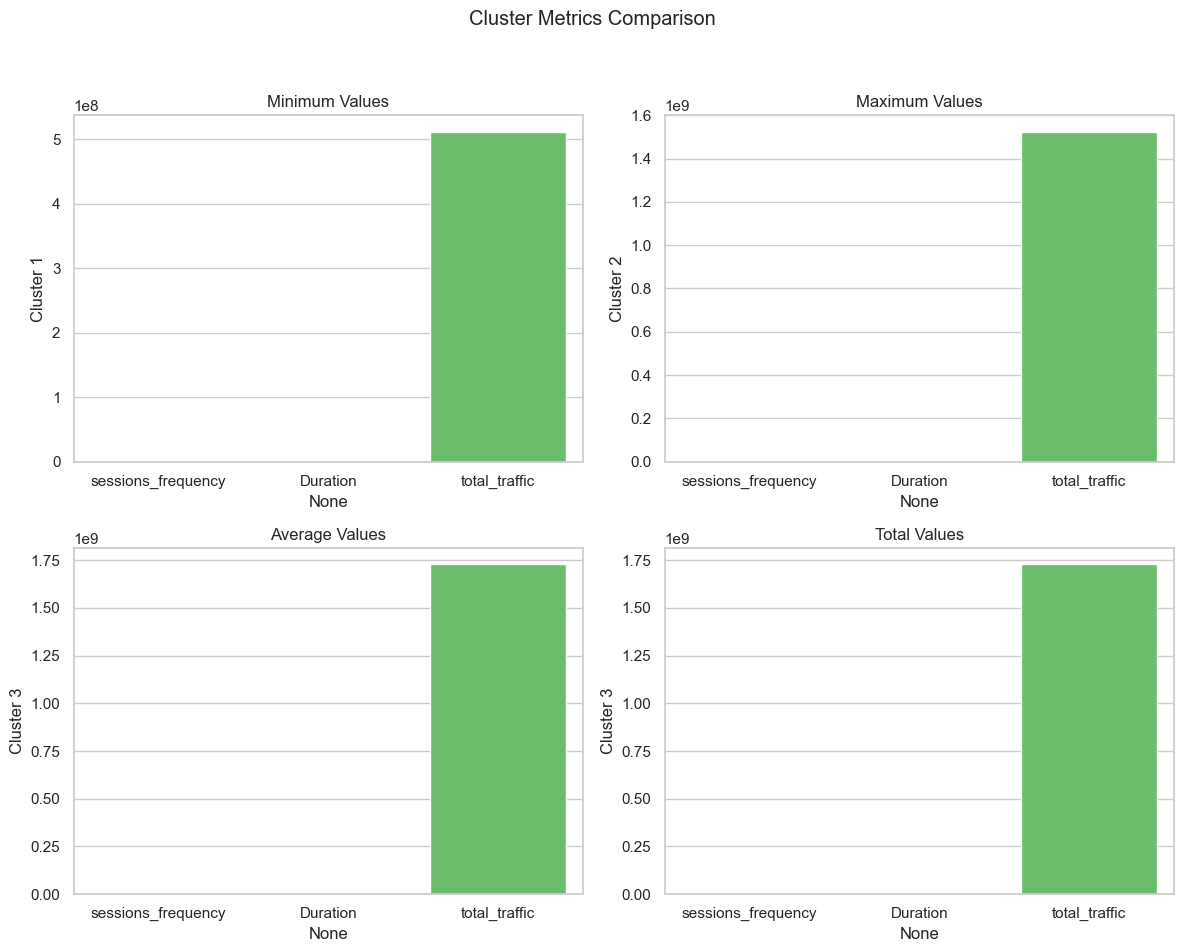

In [26]:
# Set style for better aesthetics
sns.set(style="whitegrid")

# Combine cluster metrics into a single DataFrame for easier plotting
cluster_metrics = pd.concat([cluster_1_metrics.mean(), cluster_2_metrics.mean(), cluster_3_metrics.mean()], axis=1)
cluster_metrics.columns = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Plot bar plots for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Cluster Metrics Comparison')

# Plot for Minimum Values
sns.barplot(x=cluster_metrics.index, y='Cluster 1', data=cluster_metrics, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Minimum Values')

# Plot for Maximum Values
sns.barplot(x=cluster_metrics.index, y='Cluster 2', data=cluster_metrics, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Maximum Values')

# Plot for Average Values
sns.barplot(x=cluster_metrics.index, y='Cluster 3', data=cluster_metrics, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Average Values')

# Plot for Total Values
sns.barplot(x=cluster_metrics.index, y='Cluster 3', data=cluster_metrics, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Total Values')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 4) Aggregate user total traffic per application and  top 10 most engaged users per application

In [27]:
# Extract relevant columns for application traffic
app_traffic_columns = ['MSISDN/Number', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                       'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Create a new DataFrame with only the relevant columns
app_traffic_data = telecom_data[app_traffic_columns].copy()

# Group by 'MSISDN/Number' and sum the traffic for each application
user_app_traffic = app_traffic_data.groupby('MSISDN/Number').sum()

# Calculate total traffic per user (sum across all applications)
user_app_traffic['Total Traffic'] = user_app_traffic.sum(axis=1)

# Display the top 10 most engaged users per application
for app in app_traffic_columns[1:]:
    top_10_users_app = user_app_traffic.sort_values(by=app, ascending=False).head(10)
    print(f"\nTop 10 Users for {app} Traffic:")
    print(top_10_users_app[['Total Traffic', app]])


Top 10 Users for Social Media DL (Bytes) Traffic:
               Total Traffic  Social Media DL (Bytes)
MSISDN/Number                                        
3.366258e+10    6.509921e+09               15856187.0
3.365955e+10    7.359682e+09               15520801.0
3.365816e+10    3.757030e+09               15335525.0
3.366773e+10    3.932999e+09               14538628.0
3.366552e+10    4.911050e+09               14192876.0
3.376387e+10    3.670325e+09               13343848.0
3.369844e+10    5.336757e+09               13312800.0
3.366642e+10    4.827671e+09               13171166.0
3.365813e+10    6.524111e+09               13086304.0
3.376354e+10    5.588895e+09               12940091.0

Top 10 Users for Social Media UL (Bytes) Traffic:
               Total Traffic  Social Media UL (Bytes)
MSISDN/Number                                        
3.366518e+10    5.833608e+09                 299513.0
3.366180e+10    5.188050e+09                 298890.0
3.366552e+10    4.911050e+09      

##### 5) Plot the top 3 most used applications

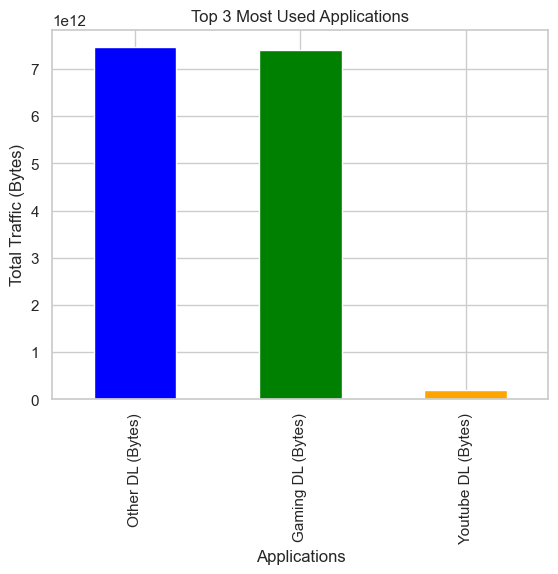

In [29]:
# Select the top 3 applications based on total traffic
top_3_apps = user_app_traffic.drop('Total Traffic', axis=1).sum().nlargest(3).index

# Extract data for the top 3 applications
top_3_apps_data = user_app_traffic[top_3_apps]

# Plot a bar chart
top_3_apps_data.sum().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Top 3 Most Used Applications')
plt.xlabel('Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

##### 6) group users in k engagement clusters based on the engagement metrics

In [32]:
#return the description of the first cluster
print("Cluser 1 ")
print("======================")
cluster_1 =  engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 0]
cluster_1.describe()

Cluser 1 


,sessions_frequency,Duration,total_traffic,Engagement Group
count,12017.000000,12017.000000,1.201700e+04,12017.0
mean,1.066323,80428.149205,5.118841e+08,0.0
std,0.248856,41857.027119,2.484192e+08,0.0
min,1.000000,8125.000000,3.802236e+07,0.0
25%,1.000000,52309.000000,2.961148e+08,0.0
50%,1.000000,86399.000000,5.182540e+08,0.0
75%,1.000000,86399.000000,7.269400e+08,0.0
max,2.000000,602049.000000,1.398728e+09,0.0


In [33]:
#return the description of the second cluster
print("Cluser 2 ")
print("======================")
cluster_2 =  engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 1]
cluster_2.describe()

Cluser 2 


,sessions_frequency,Duration,total_traffic,Engagement Group
count,1618.000000,1618.000000,1.618000e+03,1618.0
mean,2.825711,261226.507417,1.523810e+09,1.0
std,0.976169,99535.567667,5.407985e+08,0.0
min,1.000000,47696.000000,2.534302e+08,1.0
25%,2.000000,172799.000000,1.133989e+09,1.0
50%,3.000000,259197.000000,1.411271e+09,1.0
75%,3.000000,342572.250000,1.764865e+09,1.0
max,6.000000,649030.000000,3.752679e+09,1.0


In [34]:
#return the description of the third cluster
print("Cluser 3 ")
print("======================")
cluster_3 =  engagment_metrics_sorted[engagment_metrics_sorted['Engagement Group'] == 2]
cluster_3.describe()

Cluser 3 


,sessions_frequency,Duration,total_traffic,Engagement Group
count,53.000000,5.300000e+01,5.300000e+01,53.0
mean,3.377358,1.008488e+06,1.728813e+09,2.0
std,1.259219,3.632898e+05,7.779627e+08,0.0
min,1.000000,6.581390e+05,4.693671e+08,2.0
25%,2.000000,7.640310e+05,1.146194e+09,2.0
50%,3.000000,8.803780e+05,1.683163e+09,2.0
75%,4.000000,1.212618e+06,2.173430e+09,2.0
max,7.000000,2.369273e+06,4.612115e+09,2.0


In [36]:
#import necessary libraries for the k means clustering 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Initialize an empty list to store the within-cluster sum of squares (WCSS) for different values of k
wcss = []

# Try different values of k (e.g., from 1 to 10) and compute WCSS for each k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

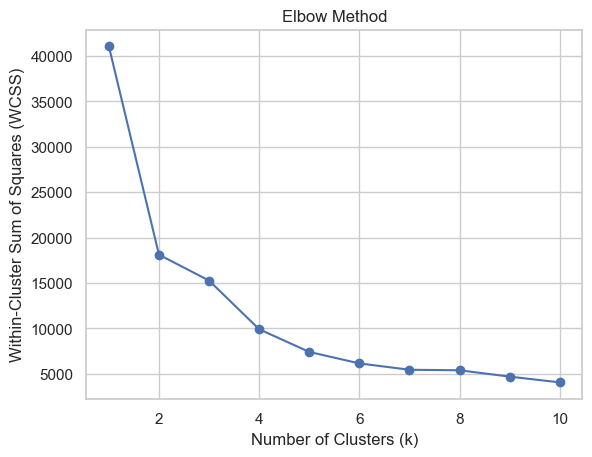

In [37]:
#use the elbow method to plot the optimized value of k
# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [38]:
# Choose the optimal value of k based on the elbow analysis
optimal_k = 3  # replace with the identified optimal value

# Perform KMeans clustering with the optimal value of k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)

# Access the final clusters assigned to each data point
final_clusters = final_kmeans.labels_
final_clusters

array([2, 1, 1, ..., 0, 0, 0])

In [39]:
# Assuming you have a DataFrame engagment_metrics_sorted with columns 'sessions_frequency', 'Duration', 'total_traffic'
# features = ['sessions_frequency', 'Duration', 'total_traffic']

# Select the relevant columns for clustering
X = engagment_metrics_sorted[['sessions_frequency', 'Duration', 'total_traffic']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming you already have the optimal_k value
optimal_k = 3

# Perform KMeans clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Assign the cluster labels to the original DataFrame
engagment_metrics_sorted['final_clusters'] = kmeans.labels_

# Calculate the engagement score for each cluster
cluster_engagement_scores = engagment_metrics_sorted.groupby('final_clusters')[['sessions_frequency', 'Duration', 'total_traffic']].sum()
cluster_engagement_scores['engagement_score'] = cluster_engagement_scores['sessions_frequency'] + \
                                                cluster_engagement_scores['Duration'] + \
                                                cluster_engagement_scores['total_traffic']

# Merge the engagement scores back to the original DataFrame using the cluster labels
engagment_metrics_sorted = pd.merge(engagment_metrics_sorted, cluster_engagement_scores[['engagement_score']],
                                   left_on='final_clusters', right_index=True, how='left')

# # # Save the DataFrame with engagement scores to a CSV file
# engagment_metrics_sorted.to_csv('engagement_scores.csv', index=False)

# Display the updated DataFrame with the engagement scores
engagment_metrics_sorted.head()



,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score
MSISDN,,,,,,
3.365955e+10,7,1896688.0,4.612115e+09,2,2,9.168052e+10
3.376373e+10,6,518395.0,1.640307e+09,1,1,2.465947e+12
3.366258e+10,6,518397.0,3.727879e+09,1,1,2.465947e+12
3.369844e+10,6,497590.0,2.881097e+09,1,1,2.465947e+12
3.369925e+10,6,515573.0,3.752679e+09,1,1,2.465947e+12


In [40]:
engagment_metrics_sorted['MSISDN'] = engagment_metrics_sorted.index
engagment_metrics_sorted.head()

,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score,MSISDN
MSISDN,,,,,,,
3.365955e+10,7,1896688.0,4.612115e+09,2,2,9.168052e+10,3.365955e+10
3.376373e+10,6,518395.0,1.640307e+09,1,1,2.465947e+12,3.376373e+10
3.366258e+10,6,518397.0,3.727879e+09,1,1,2.465947e+12,3.366258e+10
3.369844e+10,6,497590.0,2.881097e+09,1,1,2.465947e+12,3.369844e+10
3.369925e+10,6,515573.0,3.752679e+09,1,1,2.465947e+12,3.369925e+10


In [42]:
engagment_metrics_sorted.to_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/normalized/engagement_scores.csv', index=False)


In [43]:
eg=pd.read_csv('E:/KAIM 2/KAIM 2 Week 2/Week2/data/normalized/engagement_scores.csv')
eg.head()

,sessions_frequency,Duration,total_traffic,Engagement Group,final_clusters,engagement_score,MSISDN
0,7,1896688.0,4.612115e+09,2,2,9.168052e+10,3.365955e+10
1,6,518395.0,1.640307e+09,1,1,2.465947e+12,3.376373e+10
2,6,518397.0,3.727879e+09,1,1,2.465947e+12,3.366258e+10
3,6,497590.0,2.881097e+09,1,1,2.465947e+12,3.369844e+10
4,6,515573.0,3.752679e+09,1,1,2.465947e+12,3.369925e+10
